ref: 
- https://www.immersivelimit.com/tutorials/create-coco-annotations-from-scratch
- https://cocodataset.org/
- http://dreamdragon.github.io/PennAction/

### README.md 

============================================================
                     Penn Action Dataset
============================================================
Penn Action Dataset contains 2326 video sequences of 15 
different actions and human joint annotations for each 
sequence. The dataset is available for download via the
following link:

   https://upenn.box.com/PennAction

------------------------------------------------------------
                          Reference
------------------------------------------------------------
If you use our dataset, please cite the following paper:

Weiyu Zhang, Menglong Zhu and Konstantinos Derpanis,  "From 
Actemes to Action: A Strongly-supervised Representation for
Detailed Action Understanding" International Conference on 
Computer Vision (ICCV). Dec 2013.

------------------------------------------------------------
                       Dataset Content
------------------------------------------------------------
The dataset is organized in the following format:

    /frames  ( all image sequences )
       /0001 
          000001.jpg
          000002.jpg
          ...
       /0002
        ...
    /labels  ( all annotations )
        0001.mat
        0002.mat
        ...
    /tools   ( visualization scripts )
        visualize.m
        ...

The image frames are located in the /frames folder.  All 
frames are in RGB. The resolution of the frames are within
the size of 640x480.

The annotations are in the /labels folder. The sequence
annotations include class label, coarse viewpoint, human 
body joints (2D locations and visibility), 2D bounding 
boxes, and training/testing label. Each annotation is a 
separate MATLAB .mat file under /labels.


An example annotation looks as follows in MATLAB:

    annotation = 

            action: 'tennis_serve'
              pose: 'back'
                 x: [46x13 double]
                 y: [46x13 double]
        visibility: [46x13 logical]
             train: 1
              bbox: [46x4 double]
        dimensions: [272 481 46]
           nframes: 46

------------------------------------------------------------
                       List of Actions
------------------------------------------------------------
baseball_pitch  clean_and_jerk  pull_ups  strumming_guitar  
baseball_swing  golf_swing      push_ups  tennis_forehand   
bench_press     jumping_jacks   sit_ups   tennis_serve
bowling         jump_rope       squats    

------------------------------------------------------------
                      Annotation Tools
------------------------------------------------------------
The annotation tool used in creating this dataset is also
available. Please refer to http://dreamdragon.github.io/vatic/
for more details.

------------------------------------------------------------
                           Contact
------------------------------------------------------------
Please direct any questions regarding the dataset to

Menglong Zhu <menglong@cis.upenn.edu>

http://cis.upenn.edu/~menglong

In [65]:
import glob
import scipy.io
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'google.colab'

### Raw Penn Action Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/project_cv

/content/drive/MyDrive/project_cv


In [ ]:
!wget -O penn.tar.gz 'https://doc-04-4s-docs.googleusercontent.com/docs/securesc/0v69g4d9i5s5d88967fbkcpt3l7o82tq/prjj6bjcif7ufpq4rnnhk0qccbui2c57/1637976525000/16019943656023573816/16019943656023573816/1yCWjwvmdhFCT5h_4Z59Im-eHCIAHT-q_?e=download&authuser=1&nonce=mbn0i6c39eitm&user=16019943656023573816&hash=7j1tmbdgg6t3e97s01iviedshlaq7mi7'

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc
'https://doc-04-4s-docs.googleusercontent.com/docs/securesc/0v69g4d9i5s5d88967fbkcpt3l7o82tq/prjj6bjcif7ufpq4rnnhk0qccbui2c57/1637976525000/16019943656023573816/16019943656023573816/1yCWjwvmdhFCT5h_4Z59Im-eHCIAHT-q_?e=download: Unsupported scheme.
'authuser' is not recognized as an internal or external command,
operable program or batch file.
'nonce' is not recognized as an internal or external command,
operable program or batch file.
'user' is not recognized as an internal or external command,
operable program or batch file.
'hash' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!tar -xf penn.tar.gz

In [ ]:
import scipy
import scipy.misc 
from scipy import io
import os

In [ ]:
mat = io.loadmat('Penn_Action/labels/0001.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Mar 25 15:04:17 2014',
 '__version__': '1.0',
 '__globals__': [],
 'action': array(['baseball_pitch'], dtype='<U14'),
 'pose': array(['back'], dtype='<U4'),
 'x': array([[136.5 , 135.  , 102.75, ..., 102.  , 141.75,  93.  ],
        [131.25, 134.25, 102.75, ..., 102.  , 139.5 ,  93.  ],
        [130.5 , 134.25, 102.75, ..., 102.  , 137.25,  93.  ],
        ...,
        [165.  ,  93.75, 159.75, ..., 196.5 , 293.25, 181.5 ],
        [165.  ,  90.  , 159.75, ..., 196.5 , 294.75, 180.75],
        [164.25,  87.75, 160.5 , ..., 197.25, 297.  , 180.75]]),
 'y': array([[ 71.25, 102.75,  99.  , ..., 255.75, 324.75, 321.  ],
        [ 66.75, 102.  ,  98.25, ..., 255.  , 324.  , 320.25],
        [ 66.75, 102.  ,  98.25, ..., 255.  , 323.25, 320.25],
        ...,
        [126.75, 108.  , 147.75, ..., 260.25, 203.25, 210.75],
        [126.75, 106.5 , 147.  , ..., 260.25, 203.25, 206.25],
        [126.75, 100.5 , 147.  , ..., 26

In [ ]:
print('Number of frames: ', len(os.listdir('./Penn_Action/frames')))

Number of frames:  2326


In [ ]:
import glob
for subfolder in glob.glob('./Penn_Action/frames/*'):
    print(f'Number of images in subfolder {subfolder}: ', len(os.listdir(subfolder)))

Number of images in subfolder ./Penn_Action/frames\0001:  151
Number of images in subfolder ./Penn_Action/frames\0002:  80
Number of images in subfolder ./Penn_Action/frames\0003:  85
Number of images in subfolder ./Penn_Action/frames\0004:  82
Number of images in subfolder ./Penn_Action/frames\0005:  48
Number of images in subfolder ./Penn_Action/frames\0006:  81
Number of images in subfolder ./Penn_Action/frames\0007:  54
Number of images in subfolder ./Penn_Action/frames\0008:  122
Number of images in subfolder ./Penn_Action/frames\0009:  114
Number of images in subfolder ./Penn_Action/frames\0010:  111
Number of images in subfolder ./Penn_Action/frames\0011:  60
Number of images in subfolder ./Penn_Action/frames\0012:  115
Number of images in subfolder ./Penn_Action/frames\0013:  92
Number of images in subfolder ./Penn_Action/frames\0014:  68
Number of images in subfolder ./Penn_Action/frames\0015:  82
Number of images in subfolder ./Penn_Action/frames\0016:  122
Number of images i

In [ ]:
len(os.listdir('Penn_Action/labels'))

2326

In [ ]:
mat = scipy.io.loadmat('Penn_Action/labels/0001.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'action', 'pose', 'x', 'y', 'visibility', 'train', 'bbox', 'dimensions', 'nframes'])

In [ ]:
# find all actions
actions = []
poses = []
for label_file in glob.glob('./Penn_Action/labels/*'):
    mat = scipy.io.loadmat(label_file)
    action = mat['action']
    pose = mat['pose']
    if action not in actions: 
        actions.append(action)
    if pose not in poses: 
        poses.append(pose)

In [ ]:
print('Number of unique actions: ', len(actions))
print(actions)
print('Number of unique poses: ', len(poses))
print(poses)

Number of unique actions:  15
[array(['baseball_pitch'], dtype='<U14'), array(['baseball_swing'], dtype='<U14'), array(['bench_press'], dtype='<U11'), array(['bowl'], dtype='<U4'), array(['clean_and_jerk'], dtype='<U14'), array(['golf_swing'], dtype='<U10'), array(['jump_rope'], dtype='<U9'), array(['jumping_jacks'], dtype='<U13'), array(['pullup'], dtype='<U6'), array(['pushup'], dtype='<U6'), array(['situp'], dtype='<U5'), array(['squat'], dtype='<U5'), array(['strum_guitar'], dtype='<U12'), array(['tennis_forehand'], dtype='<U15'), array(['tennis_serve'], dtype='<U12')]
Number of unique poses:  4
[array(['back'], dtype='<U4'), array(['right'], dtype='<U5'), array(['front'], dtype='<U5'), array(['left'], dtype='<U4')]


In [ ]:
pullup_paths = []
pushup_paths = []
squat_paths = []
for label_file in glob.glob('./Penn_Action/labels/*'):
    mat = scipy.io.loadmat(label_file)
    if mat['action'] == 'pullup':
        pullup_paths.append(label_file)
    if mat['action'] == 'pushup':
        pushup_paths.append(label_file)
    if mat['action'] == 'squat':
        squat_paths.append(label_file)
print('Number of pull-up video: ', len(pullup_paths))
print('Number of push-up video: ', len(pushup_paths))
print('Number of squat video: ', len(squat_paths))

Number of pull-up video:  199
Number of push-up video:  211
Number of squat video:  231


    1.  head       
    2.  left_shoulder  3.  right_shoulder
    4.  left_elbow     5.  right_elbow
    6.  left_wrist     7.  right_wrist     
    8.  left_hip       9.  right_hip 
    10. left_knee      11. right_knee 
    12. left_ankle     13. right_ankle

            "keypoints": [
            "head",
            "left_shoulder","right_shoulder","left_elbow","right_elbow",
            "left_wrist","right_wrist","left_hip","right_hip",
            "left_knee","right_knee","left_ankle","right_ankle"]

            "skeleton": [
                [2,3],[2,4],[4,6],[3,5],[5,7],
                [2,8],[3,9],[8,9],[8,10],[10,12],[9,11],[11,13]
            ]

In [81]:
[np.argwhere(np.logical_or(kps_x <= 2, kps_y<=2)).squeeze().tolist()]

[12]

In [77]:
[np.argwhere(np.logical_or(kps_x <= 2, kps_y<=2)).squeeze().tolist()]

[8]

In [ ]:
import matplotlib.pyplot as plt
keypoints=["head","left_shoulder","right_shoulder","left_elbow","right_elbow",
        "left_wrist","right_wrist","left_hip","right_hip",
        "left_knee","right_knee","left_ankle","right_ankle"]

# try to visualize 1 sample
import cv2
# from google.colab.patches import cv2_imshow
import numpy as np
import random

frame_list = glob.glob('Penn_Action/frames/*/000001.jpg')
random.shuffle(frame_list)
for count, img_path in enumerate(frame_list):

    img_path = img_path
    img = cv2.imread(img_path)



    frame_num = img_path.split('\\')[-2]
    mat = scipy.io.loadmat(f'Penn_Action/labels/{frame_num}.mat')


    kps_x = np.array(mat['x'][0], dtype=int)
    kps_y = np.array(mat['y'][0], dtype=int)

    if np.all(kps_x > 2):
        continue
    
    try:
        visibility2_index= np.argwhere(np.logical_or(kps_x <= 2, kps_y<=2)).squeeze().tolist()
        print(visibility2_index)
        print('No label keypoint: ', [keypoints[index] for index in visibility2_index])
    except Exception as e:
        print('-------------------------------\n',e)
        visibility2_index= [np.argwhere(np.logical_or(kps_x <= 2, kps_y<=2)).squeeze()]
        print(visibility2_index)
        print('No label keypoint: ', [keypoints[index] for index in visibility2_index])
    

    # plt.imshow(np.asarray(img))
    # plt.show()


    print(kps_x.shape, kps_y.shape)
    lines_mapping = [[2,3],[2,4],[4,6],[3,5],[5,7],[2,8],[3,9],[8,9],[8,10],[10,12],[9,11],[11,13]]

    for pair in lines_mapping:
        # print(pair)
        img = cv2.line(img, (kps_x[pair[0]-1], kps_y[pair[0]-1]), (kps_x[pair[1]-1], kps_y[pair[1]-1]), (0,255,0), 2)

    for i in range(kps_x.size):
        img = cv2.circle(img, (kps_x[i], kps_y[i]), 2, (255,0,0), 2)

    x1,y1,x2,y2= mat['bbox'][0]
    cv2.rectangle(img, (int(x1),int(y1)), (int(x2), int(y2)), (0,255,0), 1, 1)
    # print(img.shape)
    print('(height, width) =', mat['dimensions'][0][:-1])
    plt.imshow(np.asarray(img))
    plt.show()

    for j, (v,x,y) in enumerate(zip(mat['visibility'][0], mat['x'][0], mat['y'][0])):
        print(keypoints[j], x,y,v)

    if count > 100:
        break

In [64]:
a=[
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
142,
309,
1,
177,
320,
2,
191,
398,
2,
237,
317,
2,
233,
426,
2,
306,
233,
2,
92,
452,
2,
123,
468,
2,
0,
0,
0,
251,
469,
2,
0,
0,
0,
162,
551,
2
]
print(len(a))
# "image_id": 425226
# "id": 183126
bbox = (73.35,206.02,300.58,372.5)
x, y, w, h = bbox

51


In [2]:
!gdown http://images.cocodataset.org/val2017/000000425226.jpg

Downloading...
From: http://images.cocodataset.org/val2017/000000425226.jpg
To: d:\Shared_data_ubuntu\1 VinGroup\1 Study\1 Computer Vision\Project\dataset\000000425226.jpg

  0%|          | 0.00/204k [00:00<?, ?B/s]
100%|██████████| 204k/204k [00:00<00:00, 215kB/s]
100%|██████████| 204k/204k [00:00<00:00, 214kB/s]


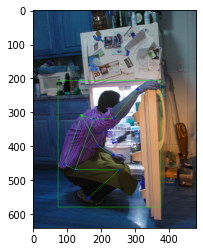

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img_coco = cv2.imread('000000425226.jpg')
a = np.array(a).reshape(-1, 3)
# print(a)
lines_mapping = [
            [16,14],[14,12],[17,15],[15,13],[12,13],[6,12],[7,13],[6,7],
            [6,8],[7,9],[8,10],[9,11],[2,3],[1,2],[1,3],[2,4],[3,5],[4,6],[5,7]
]
for (x,y,v) in a:
    if v == 0:
        color = (255,0,0)
    elif v==1:
        color = (0,255,0)
    else: color = (0,0,255)
    img_coco = cv2.circle(img_coco, (x,y), 2, color, 2)

for pair in lines_mapping:
    # print(pair)
    p1_idx = pair[0]-1
    p2_idx = pair[1]-1
    if a[p1_idx][2]==0 or a[p2_idx][2]==0: 
        continue
    p1_x, p1_y = a[p1_idx][0], a[p1_idx][1]
    p2_x, p2_y = a[p2_idx][0], a[p2_idx][1]
    img_coco = cv2.line(img_coco, (p1_x, p1_y), (p2_x, p2_y), (0,255,0), 1)
bbox = (73.35,206.02,300.58,372.5)
x, y, w, h = bbox
cv2.rectangle(img_coco, (int(x),int(y)), (int(x+w), int(y+h)), (0,255,0), 1, 1)

plt.imshow(img_coco)
plt.show()
# cv2_imshow(img_coco)

### COCO keypoints format

    "categories": [
        {
            "supercategory": "person",
            "id": 1,
            "name": "person",
            "keypoints": [
                "nose","left_eye","right_eye","left_ear","right_ear",
                "left_shoulder","right_shoulder","left_elbow","right_elbow",
                "left_wrist","right_wrist","left_hip","right_hip",
                "left_knee","right_knee","left_ankle","right_ankle"
            ],
            "skeleton": [
                [16,14],[14,12],[17,15],[15,13],[12,13],[6,12],[7,13],[6,7],
                [6,8],[7,9],[8,10],[9,11],[2,3],[1,2],[1,3],[2,4],[3,5],[4,6],[5,7]
            ]
        }
    ]

    "annotations": [
        {
            "segmentation": [[204.01,306.23,...206.53,307.95]],
            "num_keypoints": 15,
            "area": 5463.6864,
            "iscrowd": 0,
            "keypoints": [229,256,2,...,223,369,2],
            "image_id": 289343,
            "bbox": [204.01,235.08,60.84,177.36],
            "category_id": 1,
            "id": 201376
        }
    ]

    mmpose
    ├── mmpose
    ├── docs
    ├── tests
    ├── tools
    ├── configs
    `── data
        │── coco
            │-- annotations
            │   │-- person_keypoints_train2017.json
            │   |-- person_keypoints_val2017.json
            │   |-- person_keypoints_test-dev-2017.json
            |-- person_detection_results
            |   |-- COCO_val2017_detections_AP_H_56_person.json
            |   |-- COCO_test-dev2017_detections_AP_H_609_person.json
            │-- train2017
            │   │-- 000000000009.jpg
            │   │-- 000000000025.jpg
            │   │-- 000000000030.jpg
            │   │-- ...
            `-- val2017
                │-- 000000000139.jpg
                │-- 000000000285.jpg
                │-- 000000000632.jpg
                │-- ...


### Convert PennAction annotation format to JSON COCO keypoint annotation format

In [136]:
cd ..

d:\Shared_data_ubuntu\1 VinGroup\1 Study\1 Computer Vision\Project\dataset


In [137]:
import json
import shutil

In [138]:
actions_path = {
    'pushup': pushup_paths,
    'pullup': pullup_paths,
    'squat': squat_paths
}

In [139]:
import tqdm
anno_id = 0
image_dict_train = {'images': []}
annotation_dict_train = {'annotations': []}
image_dict_val = {'images': []}
annotation_dict_val = {'annotations': []}

for action in actions_path:
    print('Process action ', action)
    train_rate = 0.8
    for mat_path in tqdm.tqdm(actions_path[action]):
        train = 1 if np.random.rand()<train_rate else 0

        # print('Path to .mat file ', mat_path)
        mat = scipy.io.loadmat(mat_path)
        # print('Process %d frames of action %s' % (mat['nframes'], mat['action']))

        v_arrays = mat['visibility']
        kps_x_array = mat['x']
        kps_y_array = mat['y']
        bbox_array = mat['bbox']
        height, width = mat['dimensions'][0][:-1]
        # print(v_arrays.shape, kps_x_array.shape, kps_y_array.shape, bbox_array.shape, (height, width))

        # print()
        for i in range(mat['nframes'].squeeze()):
            try:
                # extract keypoint infomation
                kps_x = kps_x_array[i]
                kps_y = kps_y_array[i]
                

                v = [1 if v_arrays[i][j]==0 else 2 for j in range(13)]
                try: 
                    visibility2_index= np.argwhere(np.logical_or(kps_x <= 2, kps_y<=2)).squeeze().tolist()
                    v = [0 if index in visibility2_index else v[index] for index in range(13)]
                except:
                    visibility2_index= [np.argwhere(np.logical_or(kps_x <= 2, kps_y<=2)).squeeze()]
                    v = [0 if index in visibility2_index else v[index] for index in range(13)]

                x1,y1,x2,y2 = bbox_array[i]
                x,y,w,h = x1,y1,x2-x1,y2-y1
                

                # extract image id, filename
                frame_path = os.path.join(mat_path.replace('labels', 'frames')[:-4], '%06d.jpg'%(i+1))
                image_id = ''.join(frame_path.split('\\')[1:3])[:-4]
                file_name = image_id+'.jpg'

                if train:
                    image_dict_train["images"].append(
                        {
                        "license": 1,
                        "file_name": file_name,
                        "coco_url": "Unknown",
                        "height": int(height),
                        "width": int(width),
                        "date_captured": "Unknown",
                        "flickr_url": "Unknown",
                        "id": int(image_id)
                        }
                    )
                    annotation_dict_train["annotations"].append(
                        {
                            "segmentation": [[]],
                            "num_keypoints": 13,
                            "area": 0,
                            "iscrowd": 0,
                            "keypoints": list(np.array([[kps_x[i], kps_y[i], v[i]] for i in range(13)]).ravel()),
                            "image_id": int(image_id),
                            "bbox": [x,y,w,h],
                            "category_id": 1,
                            "id": anno_id
                        }
                    )
                    if not os.path.exists('./dataset/train/'+file_name):
                        shutil.copy(frame_path, './dataset/train/'+file_name)
                else:
                    image_dict_val["images"].append(
                        {
                        "license": 1,
                        "file_name": file_name,
                        "coco_url": "Unknown",
                        "height": int(height),
                        "width": int(width),
                        "date_captured": "Unknown",
                        "flickr_url": "Unknown",
                        "id": int(image_id)
                        }
                    )
                    annotation_dict_val["annotations"].append(
                        {
                            "segmentation": [[]],
                            "num_keypoints": 13,
                            "area": 0,
                            "iscrowd": 0,
                            "keypoints": list(np.array([[kps_x[i], kps_y[i], v[i]] for i in range(13)]).ravel()),
                            "image_id": int(image_id),
                            "bbox": [x,y,w,h],
                            "category_id": 1,
                            "id": anno_id
                        }
                    )
                    if not os.path.exists('./dataset/val/'+file_name):
                        shutil.copy(frame_path, './dataset/val/'+file_name)
                anno_id += 1

                # print('Frame: ', i)
                # print(image_id)
                # print(frame_path)
                # print('x: ', kps_x)
                # print('y: ', kps_y)
                # print('v: ', v)
                # print('x,y,w,h: ', x,y,w,h)
                # print()
            except Exception as e:
                # only two fail image
                # print('Failed at', i)
                print(e)
                pass

        # break
    # break

Process action  pushup


100%|██████████| 211/211 [00:09<00:00, 21.93it/s]


Process action  pullup


  2%|▏         | 4/199 [00:00<00:05, 36.65it/s]

index 71 is out of bounds for axis 0 with size 71

  4%|▍         | 8/199 [00:00<00:07, 27.06it/s]

100%|██████████| 199/199 [00:09<00:00, 20.33it/s]


Process action  squat


 90%|█████████ | 209/231 [00:15<00:01, 12.77it/s]

index 72 is out of bounds for axis 0 with size 72


100%|██████████| 231/231 [00:17<00:00, 13.50it/s]


In [120]:
(211 + 199 + 231) * 0.8

512.8000000000001

In [143]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)

with open("dataset/json_element/images_val.json", "w") as write_file:
    json.dump(image_dict_val, write_file, cls=NpEncoder)
with open("dataset/json_element/images_train.json", "w") as write_file:
    json.dump(image_dict_train, write_file, cls=NpEncoder)

with open("dataset/json_element/annotations_val.json", "w") as write_file:
    json.dump(annotation_dict_val, write_file, cls=NpEncoder)
with open("dataset/json_element/annotations_train.json", "w") as write_file:
    json.dump(annotation_dict_train, write_file, cls=NpEncoder)

with open('./dataset/json_element/categories.json', 'r') as read_file:
    categories_str = json.load(read_file)
with open('./dataset/json_element/info.json', 'r') as read_file:
    info_str = json.load(read_file)
with open('./dataset/json_element/licenses.json', 'r') as read_file:
    licenses_str = json.load(read_file)

train_json = dict(info_str, **licenses_str)
train_json.update(image_dict_train)
train_json.update(annotation_dict_train)
train_json.update(categories_str)

val_json = dict(info_str, **licenses_str)
val_json.update(image_dict_val)
val_json.update(annotation_dict_val)
val_json.update(categories_str)

with open("dataset/annotations/train.json", "w") as write_file:
    json.dump(train_json, write_file, cls=NpEncoder)

with open("dataset/annotations/val.json", "w") as write_file:
    json.dump(val_json, write_file, cls=NpEncoder)

### Test dataset

In [41]:
!pip install -U 'git+https://github.com/leimao/cocoapi.git#subdirectory=PythonAPI'

ERROR: Invalid requirement: "'git+https://github.com/leimao/cocoapi.git#subdirectory=PythonAPI'"
Hint: = is not a valid operator. Did you mean == ?


In [ ]:
%cd /content/

/content


In [ ]:
!wget -c http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip -o annotations_trainval2017.zip 

In [145]:
cd dataset

d:\Shared_data_ubuntu\1 VinGroup\1 Study\1 Computer Vision\Project\dataset\dataset


loading annotations into memory...
Done (t=0.71s)
creating index...
index created!
Number of Images Containing person: 36419


C:\Users\duytr\AppData\Local\Temp/ipykernel_10484/3698759728.py:72: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


Number of Unique Categories: 1
Category IDs:
[1]
Categories Names:
['person']
Category ID -> Category Name:
Category ID: 1, Category Name: person, Supercategory: person
Image ID: 1685000051, File Name: 1685000051.jpg, Image URL: Unknown
Category Name -> ID:
Category Name: person, Category ID: 1
Annotations for Image ID 1685000051:
[{'segmentation': [[]], 'num_keypoints': 13, 'area': 0, 'iscrowd': 0, 'keypoints': [261.0, 43.5, 2.0, 0.75, 0.75, 0.0, 267.75, 95.25, 1.0, 195.75, 79.5, 2.0, 230.25, 66.0, 2.0, 242.25, 108.0, 1.0, 226.5, 120.0, 1.0, 240.0, 173.25, 2.0, 267.75, 170.25, 2.0, 233.25, 243.75, 2.0, 264.0, 259.5, 2.0, 0.75, 0.75, 0.0, 0.75, 0.75, 0.0], 'image_id': 1685000051, 'bbox': [188.25, 21.75, 87.0, 247.5], 'category_id': 1, 'id': 26791}]


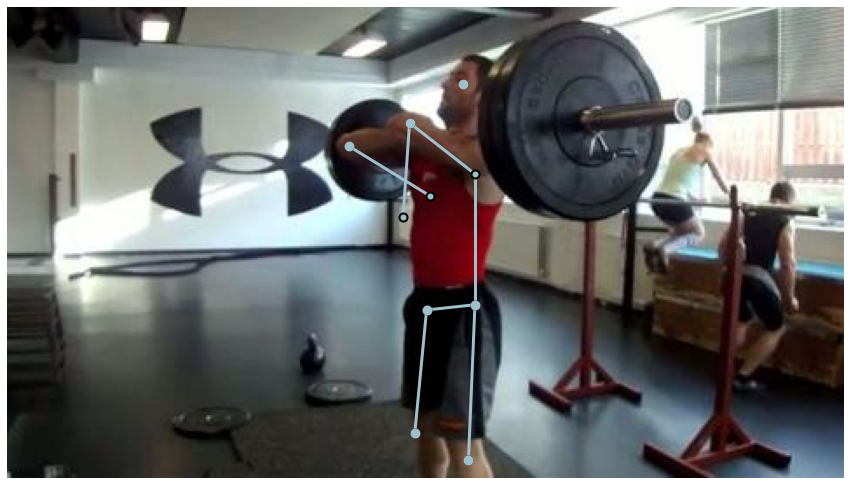

In [148]:
# num_val = 9308
# num_train = 36419

import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from PIL import Image
import requests
from pycocotools.coco import COCO


def main(print_info=False, subset='train'):

    coco_annotation_file_path = f"annotations/{subset}.json"

    coco_annotation = COCO(annotation_file=coco_annotation_file_path)

    # Category IDs.
    cat_ids = coco_annotation.getCatIds()


    # All categories.
    cats = coco_annotation.loadCats(cat_ids)
    cat_names = [cat["name"] for cat in cats]


    # Category ID -> Category Name.
    query_id = cat_ids[0]
    query_annotation = coco_annotation.loadCats([query_id])[0]
    query_name = query_annotation["name"]
    query_supercategory = query_annotation["supercategory"]


    # Category Name -> Category ID.
    query_name = cat_names[0]
    query_id = coco_annotation.getCatIds(catNms=[query_name])[0]


    # Get the ID of all the images containing the object of the category.
    img_ids = coco_annotation.getImgIds(catIds=[query_id])
    print(f"Number of Images Containing {query_name}: {len(img_ids)}")

    # Pick one image.
    img_id = np.random.choice(img_ids)
    img_info = coco_annotation.loadImgs([img_id])[0]
    img_file_name = img_info["file_name"]
    img_url = img_info["coco_url"]


    # Get all the annotations for the specified image.
    ann_ids = coco_annotation.getAnnIds(imgIds=[img_id], iscrowd=None)
    anns = coco_annotation.loadAnns(ann_ids)


    # Use URL to load image.
    try:
        im = Image.open(requests.get(img_url, stream=True).raw)
    except:
        im = Image.open(os.path.join(subset, img_file_name))

    # Save image and its labeled version.
    plt.figure(figsize=(15,15))
    plt.axis("off")
    plt.imshow(np.asarray(im))
    # plt.savefig(f"{img_id}.jpg", bbox_inches="tight", pad_inches=0)
    
    # Plot segmentation and bounding box.
    coco_annotation.showAnns(anns)
    plt.imshow(np.asarray(im))
    # plt.savefig(f"{img_id}_annotated.jpg", bbox_inches="tight", pad_inches=0)
    plt.show()
    
    if print_info:
        print(f"Number of Unique Categories: {len(cat_ids)}")
        print("Category IDs:")
        print(cat_ids)  # The IDs are not necessarily consecutive.
        print("Categories Names:")
        print(cat_names)
        print("Category ID -> Category Name:")
        print(
            f"Category ID: {query_id}, Category Name: {query_name}, Supercategory: {query_supercategory}"
        )
        print(
            f"Image ID: {img_id}, File Name: {img_file_name}, Image URL: {img_url}"
        )
        print("Category Name -> ID:")
        print(f"Category Name: {query_name}, Category ID: {query_id}")
        print(f"Annotations for Image ID {img_id}:")
        print(anns)
    return


if __name__ == "__main__":
    # from google.colab.patches import cv2_imshow
    import numpy as np
    # for i in range(50):
    #     main()
    main(print_info=True, subset='train')

In [ ]:
# loading annotations into memory...
# Done (t=1.08s)
# creating index...
# index created!
# Number of Unique Categories: 80
# Category IDs:
# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90]
# Categories Names:
# ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
# Category ID -> Category Name:
# Category ID: 1, Category Name: person, Supercategory: person
# Category Name -> ID:
# Category Name: car, Category ID: 3
# Number of Images Containing car: 535
# Image ID: 454661, File Name: 000000454661.jpg, Image URL: http://images.cocodataset.org/val2017/000000454661.jpg
# Annotations for Image ID 454661:
# [{'segmentation': [[368.36, 356.08, 498.47, 351.5, 633.17, 338.67, 639.58, 231.46, 591.02, 227.79, 549.79, 185.64, 350.03, 187.48, 295.97, 242.46, 280.39, 238.79, 268.48, 245.2, 276.73, 258.03, 247.4, 284.61, 254.73, 359.74]], 'area': 56297.64605000001, 'iscrowd': 0, 'image_id': 454661, 'bbox': [247.4, 185.64, 392.18, 174.1], 'category_id': 3, 'id': 134116}, {'segmentation': [[181.82, 210.29, 204.78, 207.53, 271.81, 207.53, 295.69, 214.88, 299.36, 220.39, 300.28, 222.22, 300.28, 225.9, 297.52, 231.41, 292.93, 236.92, 282.83, 236.92, 268.14, 244.26, 269.97, 249.77, 273.65, 252.53, 264.46, 258.95, 264.46, 264.46, 258.04, 270.89, 250.69, 275.48, 246.1, 282.83, 247.02, 293.85, 247.02, 302.11, 243.34, 314.05, 243.34, 317.72, 242.43, 320.48, 234.16, 323.23, 219.47, 323.23, 209.37, 324.15, 180.9, 316.81, 189.17, 293.85, 182.74, 290.18, 173.55, 270.89, 168.96, 258.04, 152.43, 243.34, 151.52, 243.34, 149.68, 236.92, 170.8, 212.12, 183.66, 211.2]], 'area': 10699.444349999998, 'iscrowd': 0, 'image_id': 454661, 'bbox': [149.68, 207.53, 150.6, 116.62], 'category_id': 3, 'id': 136684}, {'segmentation': [[180.23, 359.46, 177.59, 325.23, 177.59, 300.21, 176.93, 285.72, 165.08, 267.95, 153.89, 254.12, 141.38, 244.9, 145.99, 221.2, 138.09, 209.35, 120.31, 210.67, 103.19, 196.84, 92.0, 192.89, 84.1, 189.6, 74.22, 187.62, 53.81, 184.99, 26.82, 184.99, 13.65, 185.65, 0.0, 186.31, 0.49, 373.29]], 'area': 28391.276699999995, 'iscrowd': 0, 'image_id': 454661, 'bbox': [0.0, 184.99, 180.23, 188.3], 'category_id': 3, 'id': 137943}, {'segmentation': [[310.68, 128.26, 348.66, 121.93, 414.5, 128.26, 417.67, 185.87, 337.9, 191.56, 310.05, 223.22, 287.89, 204.86, 249.91, 198.53, 253.07, 166.24, 272.06, 163.71, 273.96, 141.55, 309.41, 144.08]], 'area': 10512.914100000002, 'iscrowd': 0, 'image_id': 454661, 'bbox': [249.91, 121.93, 167.76, 101.29], 'category_id': 6, 'id': 163954}, {'segmentation': [[275.39, 38.22, 315.69, 44.94, 309.93, 149.53, 273.47, 146.65]], 'area': 4106.2858, 'iscrowd': 0, 'image_id': 454661, 'bbox': [273.47, 38.22, 42.22, 111.31], 'category_id': 10, 'id': 405641}, {'segmentation': [[172.48, 118.32, 192.82, 117.7, 190.94, 186.22, 183.74, 186.22, 165.91, 186.22, 165.91, 180.59, 166.22, 136.47, 167.16, 123.02, 168.41, 119.89, 169.66, 117.07, 174.36, 116.76]], 'area': 1746.8993499999997, 'iscrowd': 0, 'image_id': 454661, 'bbox': [165.91, 116.76, 26.91, 69.46], 'category_id': 10, 'id': 408541}, {'segmentation': [[236.69, 62.77, 268.21, 63.94, 267.63, 163.2, 234.93, 162.03, 236.1, 62.19]], 'area': 3218.3995999999984, 'iscrowd': 0, 'image_id': 454661, 'bbox': [234.93, 62.19, 33.28, 101.01], 'category_id': 10, 'id': 410901}, {'segmentation': [[60.83, 162.89, 78.67, 162.16, 77.69, 188.06, 60.59, 184.15, 60.34, 164.6]], 'area': 417.91600000000017, 'iscrowd': 0, 'image_id': 454661, 'bbox': [60.34, 162.16, 18.33, 25.9], 'category_id': 10, 'id': 1381083}, {'segmentation': [[41.03, 117.84, 55.99, 117.59, 57.01, 149.28, 42.05, 147.76]], 'area': 460.1950999999999, 'iscrowd': 0, 'image_id': 454661, 'bbox': [41.03, 117.59, 15.98, 31.69], 'category_id': 10, 'id': 1384347}, {'segmentation': [[51.44, 168.71, 59.26, 169.01, 59.11, 185.09, 50.69, 184.79]], 'area': 130.7046, 'iscrowd': 0, 'image_id': 454661, 'bbox': [50.69, 168.71, 8.57, 16.38], 'category_id': 10, 'id': 2057288}]
